## Part II - (A study on the composition of a Bike Sharing System with focus on some major attributes such as Duration time, Start and end Station, Age (Age group) User type and  Gender)

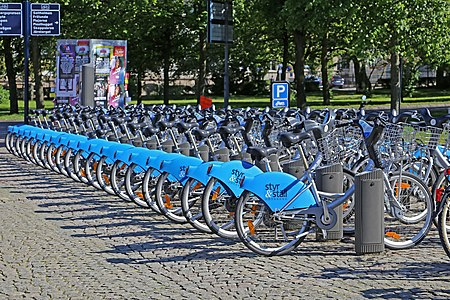

## by (Charity Ijomah-Conrad)

## Investigation Overview

My intentions on the investigation of this FordgoBike sharing system dataset is to ascertain the extent of usage of the bike sharing system, looking at the duration time of the trips, the most popular start and end stations, the kind of users who patronize the services, their age range/age group, users Gender and the unique frequency of their usage of the bike share trips. these concerns are arranged in the following query manner:

    i. Who are the users of the Ford GoBike sharing system within the period under study, i.e February/March: Yr 2019?
    ii. What is the top 10 highest duration time in seconds of the bike trip?
    iii. What are the popular start stations and end stations and start date?
    iv. What is the Age distribution of Users in the bike share trip and what age bracket used the system the most?
    v. Which gender used the bike share system the most within the period?
    vi. what is the distribution of the user type by age group in the bike share trip?
    vii What is the relationship between Age, duration_sec and Age Groups
   


## Dataset Overview

In this Fordgobike dataset, there are 183,412 entries with 16 columns made up of the following features (variables):
Duration_sec, Start_time, End_time, Start_station_id, Start_station_name, Start_station_latitude, Start_station_longitude, End_station_id, End_station_name, End_station_latitude, End_station_longitude, Bike_id, User_type, Member_birth_year, Member_gender, Bike_share_for_all_trip.

This dataset is structured in different data types vis a viz floats, object and intergers. Majority of the variables are numerical with few qualitative types. The dataset contains unique and few missing values, there are no duplicates. From the descriptive statistics, the duration_sec column being a quantitative variable, shows an evidence of outliers likewise that of Age. all of these quality concerns were handled programmatically in the data cleaning process where I executed the following cleaning tasks:

    i. extraction of start date/end date from start time/end time and converting to the right datatype - datetime.
    
    ii. converted the data types of the variables where neccesary.
    
    iii. converted member's birth year into a Numerical value called Age and restructured it into several Age-groups.
    
    iv. also change the quantitative variables into categorical types for easy analysis.
    
    v. dropped some missing values found in the data set.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
SFbikers = pd.read_csv('cleaned_SFbikers.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## i.  User types of the rider in the bike share trips and their counts 
### The user in the dataset are Subcribers and Customers. 
### Subcribers topped customers with a whopping count of 158,196 (90.5%) of the total bike share. Customer barely patronized the services, thereby having the lowest count of 16530 (9.5%)

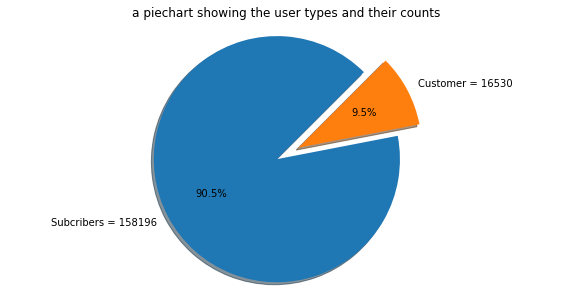

In [4]:
counts = [158196,16530]
labels = ['Subcribers = 158196', 'Customer = 16530']
plt.figure(figsize=(10,5)) 
plt.pie(counts, labels=labels, autopct='%1.1f%%', explode=[0,0.2], shadow=True, startangle=45)
plt.title('a piechart showing the user types and their counts')
plt.axis('equal')
plt.show()

## ii. Top 10 highest duration time in seconds of the bike share trips.
### The duration time in seconds with the highest count is 272 (which is approx. 5 mins) with a count of 308, followed by 323 and 305 seconds at counts of 284 and 282 respectively. we have 380 seconds at 273 counts as the least duration time in the top 10 duration insight


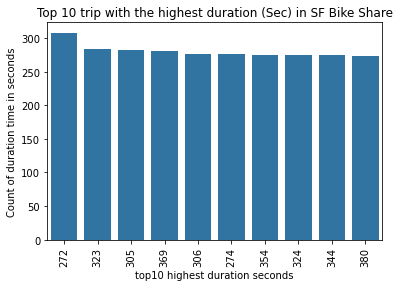

In [5]:
#bar chart showing top 10 highest duration_sec of the bike trip in the dataset
base_color = sb.color_palette()[0]
duration_top10 = SFbikers.duration_sec.value_counts()[:10].index
sb.countplot(data = SFbikers, x = 'duration_sec', color = base_color, order = duration_top10)
plt.xticks(rotation = 90)
plt.ylabel('Count of duration time in seconds')
plt.xlabel('top10 highest duration seconds')
plt.title('Top 10 trip with the highest duration (Sec) in SF Bike Share');

## iii. (a) Top 11 start stations in the bike share trip using station name.
### The start station named: Market St at 10th St. is the most used station with over 3,500 counts and the least of the top 11 stations is the start station named: Embarcadero at Sansome St. with 1846 counts. We will check if the start station have any correlation with the end stations in the next slide.

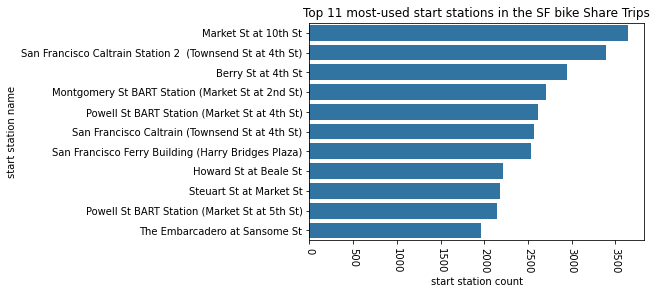

In [6]:
#bar chart showing top 10 start station for the bike trip in the dataset
base_color = sb.color_palette()[0]
start_station11 = SFbikers.start_station_name.value_counts()[:11].index
sb.countplot(data = SFbikers, y = 'start_station_name', color = base_color, order = start_station11)
plt.xticks(rotation = 270)
plt.xlabel('start station count')
plt.ylabel('start station name')
plt.title('Top 11 most-used start stations in the SF bike Share Trips');

##  iii. (b) Top 11 end stations in the bike share trip using station name.
### The end_station_name: San Francisco Caltrain Station 2 (Townsend St at 4th St) happened to be the most patronized end station with 4,599 counts, outrunning the start station: Market St at 10th St. - which is the most used start station. again, it is important to note that the start and termination of the bike rides happened mostly within the top 11 stations with varying value counts on both visuals. Suffice it to say that the top 11 start and end stations may have peculiar features that favours their users.

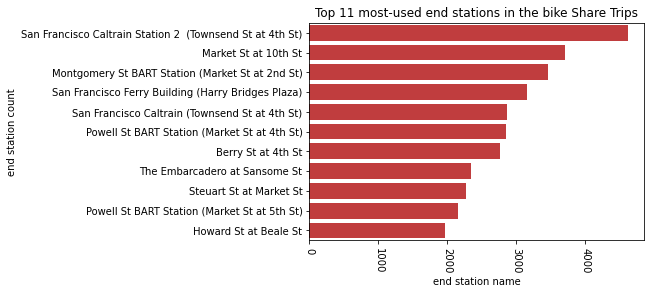

In [7]:
#bar chart showing top 11 end station for the bike trip in the dataset
base_color = sb.color_palette()[3]
end_station11 = SFbikers.end_station_name.value_counts()[:11].index
sb.countplot(data = SFbikers, y = 'end_station_name', color = base_color, order = end_station11)
plt.xticks(rotation = 270)
plt.ylabel('end station count')
plt.xlabel('end station name')
plt.title('Top 11 most-used end stations in the bike Share Trips');

##  iii. (c) Top 10 start dates in the bike share trip within the period under review.
### The highest bike share happened on the 28/02/2019 with 9,200 counts, followed by date: 20/2/2019 and with the least of the top 10 start dates on 05/2/2019 with 7981 counts.

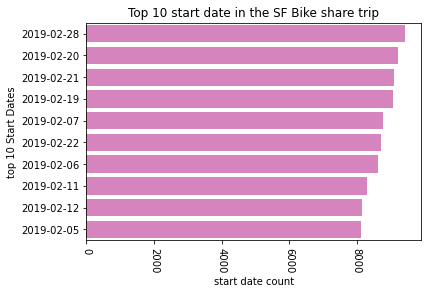

In [8]:
#bar chart showing top 10 start_date in the bike trip dataset
base_color = sb.color_palette()[6]
startdate_top10 = SFbikers.start_date.value_counts()[:10].index
sb.countplot(data = SFbikers, y = 'start_date', color = base_color, order = startdate_top10)
plt.xticks(rotation = 270)
plt.ylabel('top 10 Start Dates')
plt.xlabel('start date count')
plt.title('Top 10 start date in the SF Bike share trip');

##  iv. Age Distribtion of Users
### The Histogram plot shows that the age distribution of the users lies majorly between age 25 and 40 years with the highest freguency at age 31 years.


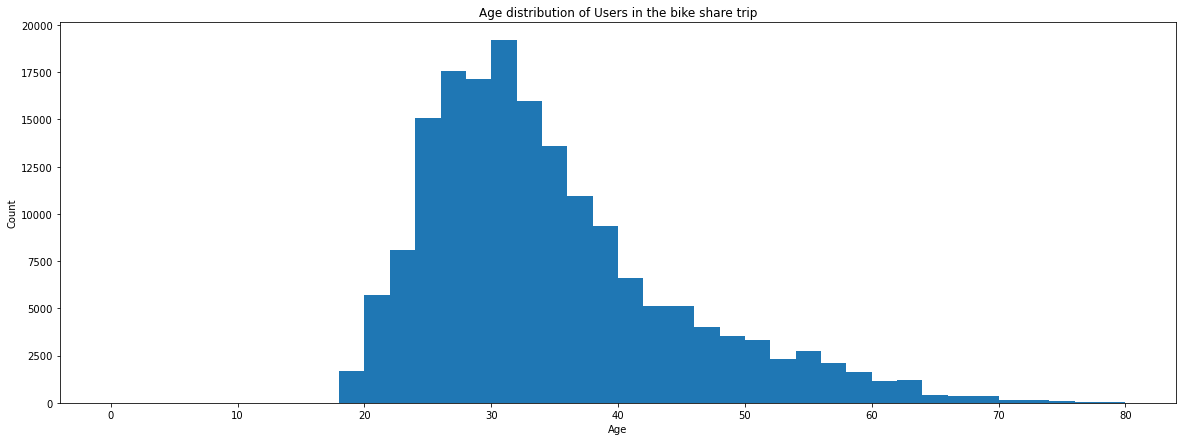

In [9]:
def histogram_solution_1():
    plt.figure(figsize=(20,7))
    bins = np.arange(0, SFbikers['Age'].max()+2, 2)
    plt.hist(SFbikers['Age'], bins = bins)
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.title('Age distribution of Users in the bike share trip');
histogram_solution_1()

##  v. Proportion of the Member Gender in the bike share system
### The male gender has the highest bike share count of 130,329 (74.6%) followed by female with a count of 40,753 (23.3%) and others at the least with 3,644 (2.1%). From the chart, the male margin over the other 2 gender types is very wide. meaning that men are the highest users of the bike share system at that period of time.

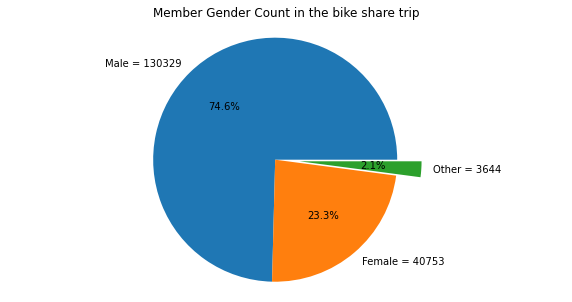

In [10]:
counts = [130329,40753, 3644]
labels = ['Male = 130329', 'Female = 40753', 'Other = 3644']
 
def func(pct):
  return "{:1.1f}%".format(pct)
plt.figure(figsize=(10,5))  
plt.pie(counts, labels=labels, autopct=lambda pct: func(pct), explode=[0,0,0.2], shadow=False)
plt.title('Member Gender Count in the bike share trip')
plt.axis('equal')
plt.show() 

## vi. What is the distribution of the user types by age group in the bike share trip
### Majority of the users are Subcribers of the Teenage Age Group, followed by youths, adults and old adults. 

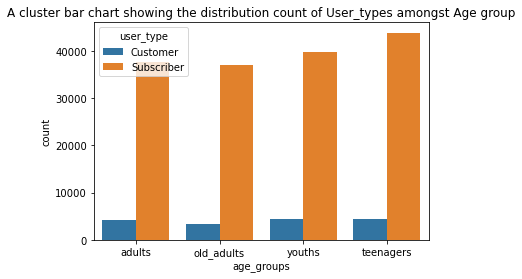

In [11]:
sb.countplot(data = SFbikers, x = 'age_groups', hue = 'user_type')
xlabel=('age_groups')
ylabel=('count')
plt.title('A cluster bar chart showing the distribution count of User_types amongst Age group');

## vii. Relationship between Age, duration_sec and Age Groups
### The older riders within the range of 40 to 80 years had their bike trip duration occurring mostly within 0 to 15,000 seconds and sparsely in longer duration time.  A sustained bike share trips duration time from 0 - 80,000 seconds can be seen more amongst the Teenagers and youths as they have more consistent duration time.

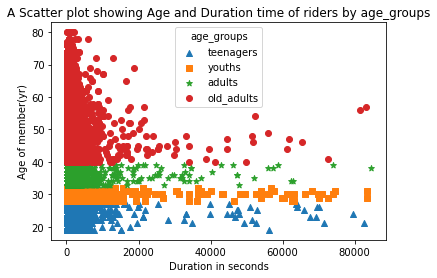

In [12]:
#plotting a multivariate scatterplot for Age, Duration and Age Group
user_plot = [['teenagers', '^'],
               ['youths', 's'],
            ['adults', '*'],
           ['old_adults', 'o'] ]

for us, marker in user_plot:
    ca_us = SFbikers[SFbikers['age_groups'] == us]
    plt.scatter(data = ca_us, x = 'duration_sec', y = 'Age', marker = marker)
plt.legend(['teenagers','youths','adults','old_adults' ], title = 'age_groups')
plt.xlabel('Duration in seconds')
plt.ylabel('Age of member(yr)')
plt.title('A Scatter plot showing Age and Duration time of riders by age_groups');

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_Fordgobikesharetrip.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 